In [3]:
import numpy as np
import pandas as pd

import quandl

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [4]:
start = pd.to_datetime("2012-01-01")
end = pd.to_datetime("2017-01-01")

aapl_df = quandl.get(
    dataset = "WIKI/AAPL.11",
    start_date = start, 
    end_date = end
)
cisco_df = quandl.get(
    dataset = "WIKI/CSCO.11",
    start_date = start, 
    end_date = end
)
ibm_df = quandl.get(
    dataset = "WIKI/IBM.11",
    start_date = start, 
    end_date = end
)
amazon_df = quandl.get(
    dataset = "WIKI/AMZN.11",
    start_date = start, 
    end_date = end
)

In [7]:
aapl_df

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183
...,...
2016-12-23,115.080808
2016-12-27,115.811668
2016-12-28,115.317843


In [10]:
stocks_df = pd.concat(
    [
        aapl_df["Adj. Close"].rename("aapl"),
        amazon_df["Adj. Close"].rename("amazon"),
        cisco_df["Adj. Close"].rename("cisco"),
        ibm_df["Adj. Close"].rename("ibm"),

    ], 
    axis=1
)

stocks_df.head(3)

,aapl,amazon,cisco,ibm
Date,,,,
2012-01-03,52.848787,179.03,15.617341,157.578371
2012-01-04,53.132802,177.51,15.919125,156.935540
2012-01-05,53.722681,177.61,15.860445,156.191208


In [13]:
stocks_df.pct_change().mean(0)

aapl      0.000750
amazon    0.001328
cisco     0.000599
ibm       0.000081
dtype: float64

In [14]:
stocks_df.pct_change().corr()

,aapl,amazon,cisco,ibm
aapl,1.000000,0.235487,0.301990,0.297498
amazon,0.235487,1.000000,0.284470,0.258492
cisco,0.301990,0.284470,1.000000,0.424672
ibm,0.297498,0.258492,0.424672,1.000000


In [16]:
stocks_df.pct_change(periods=1).head()

,aapl,amazon,cisco,ibm
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,-0.008490,0.019324,-0.004079
2012-01-05,0.011102,0.000563,-0.003686,-0.004743
2012-01-06,0.010454,0.028152,-0.003700,-0.011481
2012-01-09,-0.001586,-0.022178,0.006366,-0.005204


In [18]:
log_returns = np.log(stocks_df.divide(stocks_df.shift(1)))
log_returns.head()

,aapl,amazon,cisco,ibm
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,-0.008526,0.019139,-0.004088
2012-01-05,0.011041,0.000563,-0.003693,-0.004754
2012-01-06,0.010400,0.027763,-0.003707,-0.011547
2012-01-09,-0.001587,-0.022428,0.006346,-0.005218


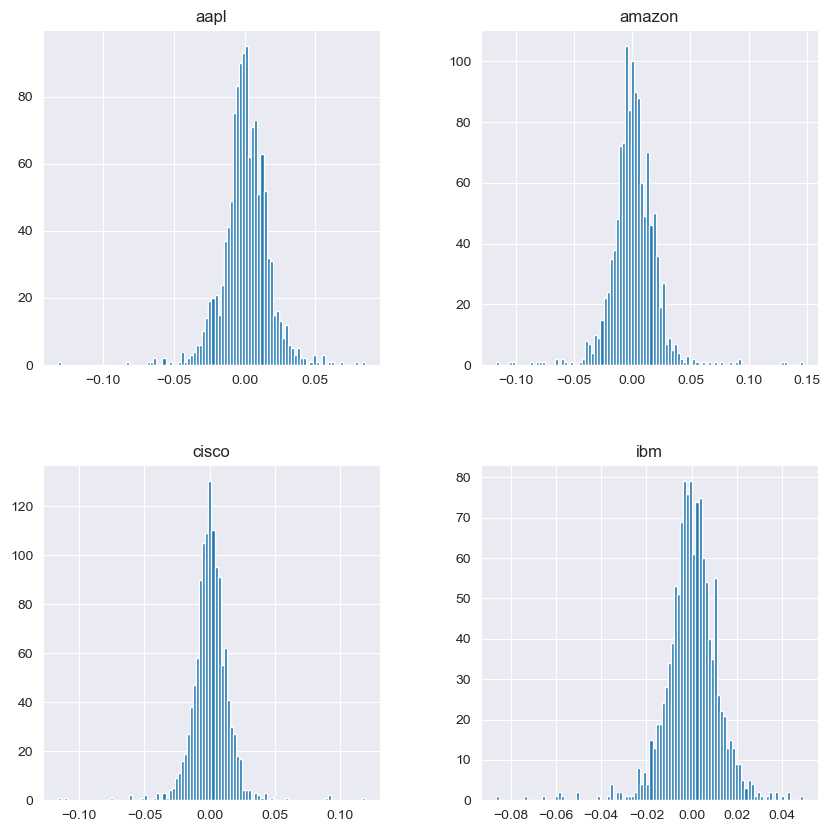

In [20]:
log_returns.hist(bins=100, figsize=(10, 10));

In [21]:
log_returns.mean()

aapl      0.000614
amazon    0.001139
cisco     0.000497
ibm       0.000011
dtype: float64

In [22]:
log_returns.cov() * 252

,aapl,amazon,cisco,ibm
aapl,0.068326,0.018986,0.017854,0.014464
amazon,0.018986,0.094470,0.019956,0.014939
cisco,0.017854,0.019956,0.051381,0.018029
ibm,0.014464,0.014939,0.018029,0.035203


In [28]:
print(stocks_df.columns)

weights = np.array(np.random.random(4))
weights = weights / weights.sum()
print(f"Random weights: {weights}")

exp_ret = np.sum(
    (log_returns.mean() * weights) * 252
)
print(f"Expected Portfolio Return: {exp_ret}")

exp_vol = np.sqrt(
    np.dot(
        weights.T, np.dot(log_returns.cov() * 252, weights))
)
print(f"Expected Volatility: {exp_vol}")


sharpe_ratio = exp_ret / exp_vol
print(f"Sharpe Ratio: {sharpe_ratio}")


Index(['aapl', 'amazon', 'cisco', 'ibm'], dtype='object')
Random weights: [0.09225451 0.22512413 0.23829641 0.44432495]
Expected Portfolio Return: 0.11002142860615398
Expected Volatility: 0.16414654704729797
Sharpe Ratio: 0.6702634358458474


In [36]:
from tqdm import tqdm

num_portfolios = 5000
all_weights_matrix = np.zeros((num_portfolios, len(stocks_df.columns)))

return_array = np.zeros(num_portfolios)
volatility_array = np.zeros(num_portfolios)
sharpe_ratio_array = np.zeros(num_portfolios)

for index in tqdm(range(num_portfolios)):

    weights = np.array(np.random.random(4))
    weights = weights / weights.sum()

    all_weights_matrix[index, :] = weights
    
    return_array[index] = np.sum(
        (log_returns.mean() * weights) * 252
    )
    
    volatility_array[index] = np.sqrt(
        np.dot(
            weights.T, np.dot(log_returns.cov() * 252, weights))
    )

    sharpe_ratio_array[index] = return_array[index] / volatility_array[index]


100%|██████████| 5000/5000 [00:02<00:00, 2111.32it/s]


In [37]:
sharpe_ratio_array.max()

1.026802137301144

In [42]:
id_max_sharpe_ratio = sharpe_ratio_array.argmax()
id_max_sharpe_ratio

150

In [39]:
sharpe_ratio_array[:5]

array([1.017731  , 0.82582681, 0.82121981, 0.73069091, 0.81055351])

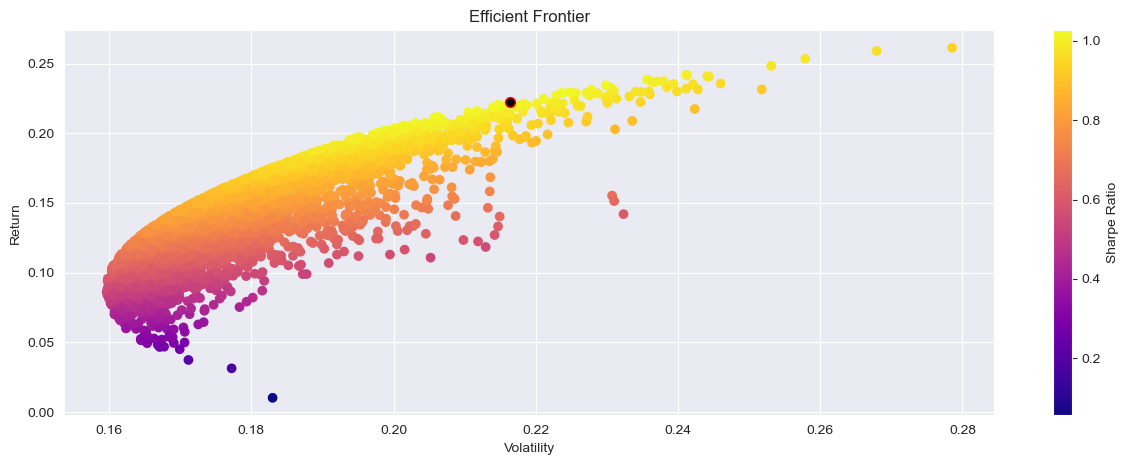

In [46]:
plt.figure(figsize=(15, 5))
plt.scatter(
    x=volatility_array, 
    y=return_array, 
    c=sharpe_ratio_array,
    cmap="plasma"
)
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.title("Efficient Frontier")
plt.scatter(
    x=volatility_array[id_max_sharpe_ratio], 
    y=return_array[id_max_sharpe_ratio], 
    color="black", 
    s=50, 
    edgecolors="red"
);

In [47]:
def get_ret_vol_sr(input_weights):
    input_weights = np.array(input_weights)
    returns = np.sum(log_returns.mean() * input_weights) * 252
    volatility = np.sqrt(
        np.dot(
            input_weights.T,
            np.dot(
                log_returns.cov() * 252 ,
                input_weights
            )
        )
    )
    sharpe_ratio = returns / volatility
    return np.array([returns, volatility, sharpe_ratio])

In [48]:
from scipy.optimize import minimize

In [49]:
def negative_sharpe(input_weights):
    return get_ret_vol_sr(input_weights)[2] * -1

In [50]:
def check_sum(input_weights):
    # return 0 if sum of the weights is 1
    return np.sum(input_weights) - 1

In [51]:
constraints = ({"type": "eq", "fun": check_sum})
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))
init_guess = [0.25, 0.25, 0.25, 0.25]

In [52]:
optimal_results = minimize(
    fun=negative_sharpe, 
    x0=init_guess, 
    method="SLSQP", # sequentials least square algorithm
    bounds=bounds, 
    constraints=constraints
)
optimal_results

     fun: -1.0307168703348073
     jac: array([ 5.64157963e-05, -4.45097685e-05,  4.18424606e-05,  3.39921713e-01])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.26628977, 0.5295204 , 0.20418983, 0.        ])

In [53]:
optimal_results.x

array([0.26628977, 0.5295204 , 0.20418983, 0.        ])

In [54]:
get_ret_vol_sr(optimal_results.x)

array([0.21885915, 0.21233683, 1.03071687])

In [55]:
frontier_y = np.linspace(0, 0.3, 100)

In [56]:
def minimize_volatility(input_weights):
    return get_ret_vol_sr(input_weights)[1]

In [57]:
frontier_volatility = []

for possible_return in tqdm(frontier_y):
    
    constraint = (
        {"type": "eq", "fun": check_sum}, 
        {"type": "eq", "fun": lambda w: get_ret_vol_sr(w)[0] - possible_return}
    )
    
    result = minimize(
        fun=minimize_volatility, 
        x0=init_guess, 
        method="SLSQP",
        bounds=bounds, 
        constraints=constraint
    )
    frontier_volatility.append(result["fun"])
    

100%|██████████| 100/100 [00:02<00:00, 38.43it/s]


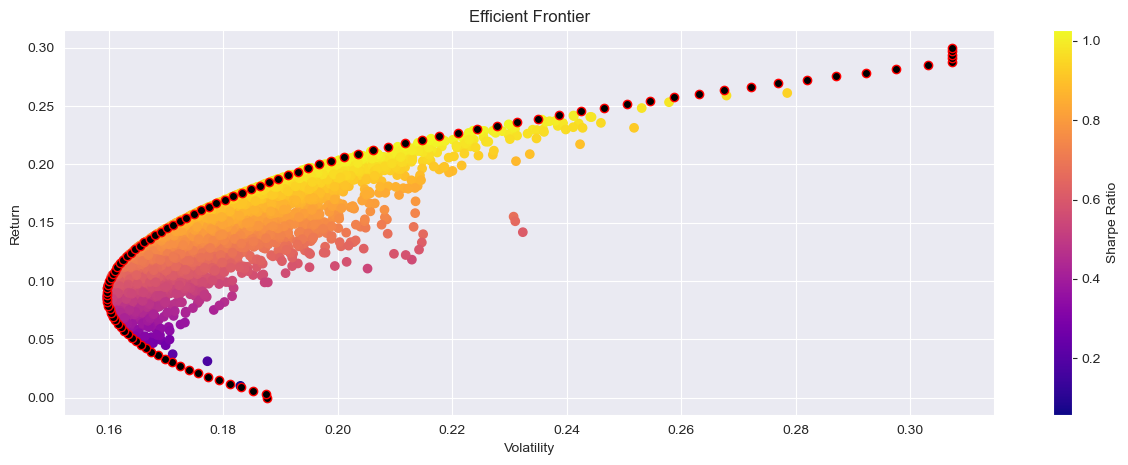

In [68]:
plt.figure(figsize=(15, 5))
plt.scatter(
    x=volatility_array, 
    y=return_array, 
    c=sharpe_ratio_array,
    cmap="plasma"
)
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.title("Efficient Frontier")

plt.scatter(
    x=frontier_volatility, 
    y=frontier_y, 
    #linewidths=1,
    color="black", 
    #s=50, 
    edgecolors="red"
);